In [17]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import  Dense,Flatten
#from tensorflow.keras import layers,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 8s 0us/step


In [13]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height,img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [22]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                             validation_split=0.2,
                                                             subset="validation",
                                                             seed=123,
                                                             image_size = (img_height,img_width),
                                                             batch_size=batch_size


                                                        )

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [25]:

from tensorflow.keras import layers

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in trainds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classnames[labels[i]])
    plt.axis("off")

NameError: ignored

<Figure size 720x720 with 0 Axes>

<ipython-input-32-55c558f2709e>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(4, 4, i + 1)


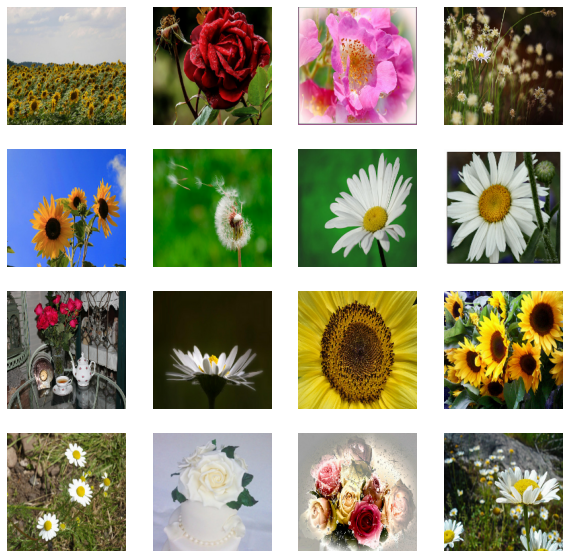

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(4):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.axis("off")

In [37]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [39]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10,verbose=2)

Epoch 1/10
92/92 - 453s - loss: 0.1894 - accuracy: 0.9353 - val_loss: 0.5244 - val_accuracy: 0.8256 - 453s/epoch - 5s/step
Epoch 2/10
92/92 - 439s - loss: 0.1180 - accuracy: 0.9578 - val_loss: 0.5059 - val_accuracy: 0.8610 - 439s/epoch - 5s/step
Epoch 3/10
92/92 - 440s - loss: 0.0590 - accuracy: 0.9813 - val_loss: 0.4542 - val_accuracy: 0.8651 - 440s/epoch - 5s/step
Epoch 4/10
92/92 - 440s - loss: 0.0283 - accuracy: 0.9932 - val_loss: 0.4895 - val_accuracy: 0.8624 - 440s/epoch - 5s/step
Epoch 5/10
92/92 - 437s - loss: 0.0130 - accuracy: 0.9983 - val_loss: 0.4606 - val_accuracy: 0.8801 - 437s/epoch - 5s/step
Epoch 6/10
92/92 - 436s - loss: 0.0063 - accuracy: 0.9993 - val_loss: 0.4703 - val_accuracy: 0.8774 - 436s/epoch - 5s/step
Epoch 7/10
92/92 - 441s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.4823 - val_accuracy: 0.8801 - 441s/epoch - 5s/step
Epoch 8/10
92/92 - 446s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.4879 - val_accuracy: 0.8828 - 446s/epoch - 5s/step
Epoch 9/10
92/92